In [1]:
import pandas as pd
import copy
street_signs = pd.read_csv('MergedData/intersections_collision_streetlights_streets_street_sign.csv')

## Part I street_signs modeling
### import data and pre-process

In [2]:
street_signs.head(10)

,X,Y,UNITDESC,ARTERIALCLASSCD,SIGNAL_TYPE,collision_count,streetlights,streetlights_height_avg,related_street_num,PVMTCONDINDX1_mean,SLOPE_PCT_mean,TRANCLASS_mean,SPEEDLIMIT_mean,stop_sign_quantities,yield_sign_quantities
0,-122.329732,47.523051,4TH AVE S AND S HENDERSON N ST,0.0,NONE,0,0,0.0,2.0,46.000000,2.000000,0.0,20.000000,1,0
1,-122.371401,47.692058,12TH AVE NW AND NW 87TH ST,0.0,NONE,0,1,50.0,3.0,95.333333,1.666667,0.0,20.000000,0,0
2,-122.289176,47.617639,34TH AVE AND E HOWELL ST,3.0,NONE,0,2,50.0,4.0,43.000000,7.250000,1.5,22.500000,2,0
3,-122.320648,47.674000,NE 63RD ST AND NE RAVENNA EB BV,1.0,NONE,1,1,0.0,1.0,78.000000,0.000000,0.0,20.000000,0,0
4,-122.263468,47.547165,WILSON AVE S AND S UPLAND RD,2.0,NONE,1,1,50.0,3.0,43.333333,4.000000,0.0,23.333333,1,0
5,-122.360652,47.684740,3RD AVE NW AND NW 77TH ST,3.0,NONE,6,1,50.0,4.0,77.750000,2.000000,0.0,22.500000,2,0
6,-122.305361,47.695749,RAVENNA AVE NE AND NE 92ND ST,1.0,NONE,14,0,0.0,4.0,68.000000,3.000000,1.5,22.500000,3,0
7,-122.286434,47.599643,LAKESIDE UPPER AVE S AND S LESCHI PL,0.0,NONE,2,1,55.0,2.0,95.000000,6.000000,0.0,20.000000,1,0
8,-122.280735,47.537049,42ND AVE S AND S OTHELLO ST,2.0,NONE,10,2,33.0,2.0,81.000000,1.500000,3.0,25.000000,0,0
9,-122.296116,47.618899,M L KING JR WAY AND E DENNY WAY,3.0,NONE,19,1,55.0,3.0,39.000000,6.333333,1.0,21.666667,2,0


In [3]:
street_signs["traffic_flow_index"] = street_signs["ARTERIALCLASSCD"] + 1
street_signs["collision_rate "] = street_signs["collision_count"] / street_signs["traffic_flow_index"]

street_signs = street_signs.drop(columns=["ARTERIALCLASSCD", "traffic_flow_index", "collision_count"])

street_signs.head(10)

,X,Y,UNITDESC,SIGNAL_TYPE,streetlights,streetlights_height_avg,related_street_num,PVMTCONDINDX1_mean,SLOPE_PCT_mean,TRANCLASS_mean,SPEEDLIMIT_mean,stop_sign_quantities,yield_sign_quantities,collision_rate
0,-122.329732,47.523051,4TH AVE S AND S HENDERSON N ST,NONE,0,0.0,2.0,46.000000,2.000000,0.0,20.000000,1,0,0.000000
1,-122.371401,47.692058,12TH AVE NW AND NW 87TH ST,NONE,1,50.0,3.0,95.333333,1.666667,0.0,20.000000,0,0,0.000000
2,-122.289176,47.617639,34TH AVE AND E HOWELL ST,NONE,2,50.0,4.0,43.000000,7.250000,1.5,22.500000,2,0,0.000000
3,-122.320648,47.674000,NE 63RD ST AND NE RAVENNA EB BV,NONE,1,0.0,1.0,78.000000,0.000000,0.0,20.000000,0,0,0.500000
4,-122.263468,47.547165,WILSON AVE S AND S UPLAND RD,NONE,1,50.0,3.0,43.333333,4.000000,0.0,23.333333,1,0,0.333333
5,-122.360652,47.684740,3RD AVE NW AND NW 77TH ST,NONE,1,50.0,4.0,77.750000,2.000000,0.0,22.500000,2,0,1.500000
6,-122.305361,47.695749,RAVENNA AVE NE AND NE 92ND ST,NONE,0,0.0,4.0,68.000000,3.000000,1.5,22.500000,3,0,7.000000
7,-122.286434,47.599643,LAKESIDE UPPER AVE S AND S LESCHI PL,NONE,1,55.0,2.0,95.000000,6.000000,0.0,20.000000,1,0,2.000000
8,-122.280735,47.537049,42ND AVE S AND S OTHELLO ST,NONE,2,33.0,2.0,81.000000,1.500000,3.0,25.000000,0,0,3.333333
9,-122.296116,47.618899,M L KING JR WAY AND E DENNY WAY,NONE,1,55.0,3.0,39.000000,6.333333,1.0,21.666667,2,0,4.750000


In [5]:
street_signs = street_signs.drop(columns=["X", "Y", "UNITDESC"])

street_signs.head(10)

,SIGNAL_TYPE,streetlights,streetlights_height_avg,related_street_num,PVMTCONDINDX1_mean,SLOPE_PCT_mean,TRANCLASS_mean,SPEEDLIMIT_mean,stop_sign_quantities,yield_sign_quantities,collision_rate
0,NONE,0,0.0,2.0,46.000000,2.000000,0.0,20.000000,1,0,0.000000
1,NONE,1,50.0,3.0,95.333333,1.666667,0.0,20.000000,0,0,0.000000
2,NONE,2,50.0,4.0,43.000000,7.250000,1.5,22.500000,2,0,0.000000
3,NONE,1,0.0,1.0,78.000000,0.000000,0.0,20.000000,0,0,0.500000
4,NONE,1,50.0,3.0,43.333333,4.000000,0.0,23.333333,1,0,0.333333
5,NONE,1,50.0,4.0,77.750000,2.000000,0.0,22.500000,2,0,1.500000
6,NONE,0,0.0,4.0,68.000000,3.000000,1.5,22.500000,3,0,7.000000
7,NONE,1,55.0,2.0,95.000000,6.000000,0.0,20.000000,1,0,2.000000
8,NONE,2,33.0,2.0,81.000000,1.500000,3.0,25.000000,0,0,3.333333
9,NONE,1,55.0,3.0,39.000000,6.333333,1.0,21.666667,2,0,4.750000


In [6]:
street_signs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13813 entries, 0 to 13812
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SIGNAL_TYPE              13813 non-null  object 
 1   streetlights             13813 non-null  int64  
 2   streetlights_height_avg  13813 non-null  float64
 3   related_street_num       13813 non-null  float64
 4   PVMTCONDINDX1_mean       13813 non-null  float64
 5   SLOPE_PCT_mean           13813 non-null  float64
 6   TRANCLASS_mean           13813 non-null  float64
 7   SPEEDLIMIT_mean          13813 non-null  float64
 8   stop_sign_quantities     13813 non-null  int64  
 9   yield_sign_quantities    13813 non-null  int64  
 10  collision_rate           13813 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.2+ MB


### Use cross validation+random forest to do the modelling

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into input features X and target variable y
X = street_signs.drop(columns=["collision_rate "])
y = street_signs["collision_rate "]

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the model
rf.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = rf.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)

print("Cross-validation scores:", -cv_scores)
print("Mean squared error on test set:", mse)

Cross-validation scores: [ 8.85100644  9.32176777  8.65582848  8.72829925 10.03720718]
Mean squared error on test set: 8.905118645565846


In [61]:
print(f"Mean of collision_rate: {street_signs['collision_rate '].mean()}")

Mean of collision_rate: 1.5477098868215942


### ChatGPT interpolate the result
##### The training results show the cross-validation scores and the mean squared error on the test set when modeling the data using a random forest regressor.

##### Cross-Validation Scores:
##### The cross-validation scores are a list containing 5 values, each representing the performance of the model on a different training/validation data split. Here, the negative mean squared error is used as the scoring metric. Generally, a lower mean squared error indicates better model performance. However, in this case, we use the negative mean squared error, so values closer to 0 indicate better performance.

##### 1st cross-validation score: 0.08300897
##### 2nd cross-validation score: 0.08858813
##### 3rd cross-validation score: 0.08617691
##### 4th cross-validation score: 0.08685302
##### 5th cross-validation score: 0.08686454
##### Test Set Mean Squared Error:
##### The mean squared error (MSE) on the test set is a single value that represents the error the model produces when predicting unseen data. The MSE is a commonly used metric for measuring prediction accuracy. A lower value indicates better performance on the test set.

##### Test set mean squared error: 0.08771023589859456

100%|===================| 2751/2763 [02:47<00:00]        

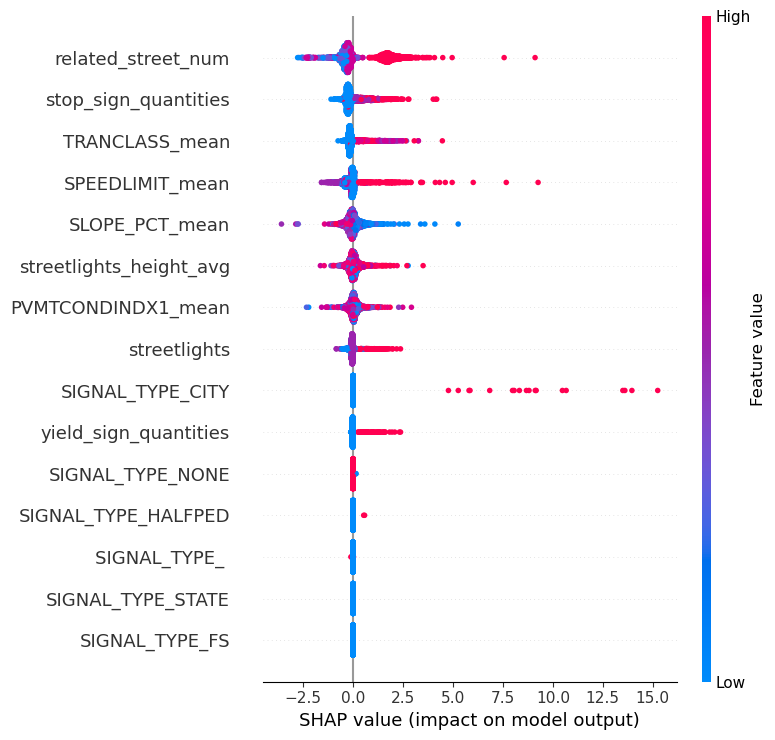

In [63]:
import shap

# Create a SHAP explainer object for the random forest model
explainer = shap.Explainer(rf, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test,check_additivity=False)

# Generate the summary plot
shap.summary_plot(shap_values, X_test)

## Part II traffic_signals modeling
### import data and pre-process

In [35]:
traffic_signals = pd.read_csv('MergedData/intersections_collision_streetlights_streets_traffic_signals.csv')
first_row = traffic_signals.iloc[1]
for column_name, value in zip(traffic_signals.columns, first_row):
    print(f"{column_name}: {value}")

X: -122.338903694
Y: 47.6092851430001
UNITDESC: 2ND AVE AND PIKE ST
ARTERIALCLASSCD: 1.0
SIGNAL_TYPE_x: CITY
collision_count: 58
streetlights: 2
streetlights_height_avg: 15.0
related_street_num: 4.0
PVMTCONDINDX1_mean: 80.25
SLOPE_PCT_mean: 2.5
TRANCLASS_mean: 1.5
SPEEDLIMIT_mean: 25.0
SIGNAL_TYPE_y: PRE
COMPTYPE: 74.0
CONDITION: FAIR
INT_SIGNAL_TYPE_CD: CITY
PEDSIGNALYN: N
PEDAUDIODEVICEYN: N
PP_QUANTITY: 8.0
PH_QUANTITY: 8.0
BIKESIGNALHDYN: Y
LTTURNSIGNALYN: N
RTTURNSIGNALYN: N
DETDEVSTOPBARYN: N
DETDEVADVANCEDYN: N
DETDEVSYSTEMYN: N
NUM_ATTACHMENTS: 0.0


In [36]:
traffic_signals["traffic_flow_index"] = traffic_signals["ARTERIALCLASSCD"] + 1
traffic_signals["collision_rate "] = traffic_signals["collision_count"] / traffic_signals["traffic_flow_index"]

traffic_signals = traffic_signals.drop(columns=["ARTERIALCLASSCD", "traffic_flow_index", "collision_count"])
traffic_signals = traffic_signals.drop(columns=["INT_SIGNAL_TYPE_CD"])
traffic_signals = traffic_signals.drop(columns=["X", "Y", "UNITDESC"])

In [37]:
first_row = traffic_signals.iloc[1]
for column_name, value in zip(traffic_signals.columns, first_row):
    print(f"{column_name}: {value}")

SIGNAL_TYPE_x: CITY
streetlights: 2
streetlights_height_avg: 15.0
related_street_num: 4.0
PVMTCONDINDX1_mean: 80.25
SLOPE_PCT_mean: 2.5
TRANCLASS_mean: 1.5
SPEEDLIMIT_mean: 25.0
SIGNAL_TYPE_y: PRE
COMPTYPE: 74.0
CONDITION: FAIR
PEDSIGNALYN: N
PEDAUDIODEVICEYN: N
PP_QUANTITY: 8.0
PH_QUANTITY: 8.0
BIKESIGNALHDYN: Y
LTTURNSIGNALYN: N
RTTURNSIGNALYN: N
DETDEVSTOPBARYN: N
DETDEVADVANCEDYN: N
DETDEVSYSTEMYN: N
NUM_ATTACHMENTS: 0.0
collision_rate : 29.0


In [38]:
traffic_signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SIGNAL_TYPE_x            1102 non-null   object 
 1   streetlights             1102 non-null   int64  
 2   streetlights_height_avg  1102 non-null   float64
 3   related_street_num       1102 non-null   float64
 4   PVMTCONDINDX1_mean       1102 non-null   float64
 5   SLOPE_PCT_mean           1102 non-null   float64
 6   TRANCLASS_mean           1102 non-null   float64
 7   SPEEDLIMIT_mean          1102 non-null   float64
 8   SIGNAL_TYPE_y            1102 non-null   object 
 9   COMPTYPE                 1102 non-null   float64
 10  CONDITION                1102 non-null   object 
 11  PEDSIGNALYN              1102 non-null   object 
 12  PEDAUDIODEVICEYN         1102 non-null   object 
 13  PP_QUANTITY              1102 non-null   float64
 14  PH_QUANTITY             


### Use cross validation+random forest to do the modelling

In [53]:
print(traffic_signals.columns)

Index(['SIGNAL_TYPE_x', 'streetlights', 'streetlights_height_avg',
       'related_street_num', 'PVMTCONDINDX1_mean', 'SLOPE_PCT_mean',
       'TRANCLASS_mean', 'SPEEDLIMIT_mean', 'SIGNAL_TYPE_y', 'COMPTYPE',
       'CONDITION', 'PEDSIGNALYN', 'PEDAUDIODEVICEYN', 'PP_QUANTITY',
       'PH_QUANTITY', 'BIKESIGNALHDYN', 'LTTURNSIGNALYN', 'RTTURNSIGNALYN',
       'DETDEVSTOPBARYN', 'DETDEVADVANCEDYN', 'DETDEVSYSTEMYN',
       'NUM_ATTACHMENTS', 'collision_rate '],
      dtype='object')


In [64]:

X = traffic_signals.drop(columns=["collision_rate "])
y = traffic_signals["collision_rate "]

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the model
rf.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = rf.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)

print("Cross-validation scores:", -cv_scores)
print("Mean squared error on test set:", mse)


Cross-validation scores: [214.09171394 130.87544993 155.27798708 184.00003655 214.75248902]
Mean squared error on test set: 14.182536111111109


In [65]:
print(f"Mean of collision_rate: {traffic_signals['collision_rate '].mean()}")

Mean of collision_rate: 17.05255595886268


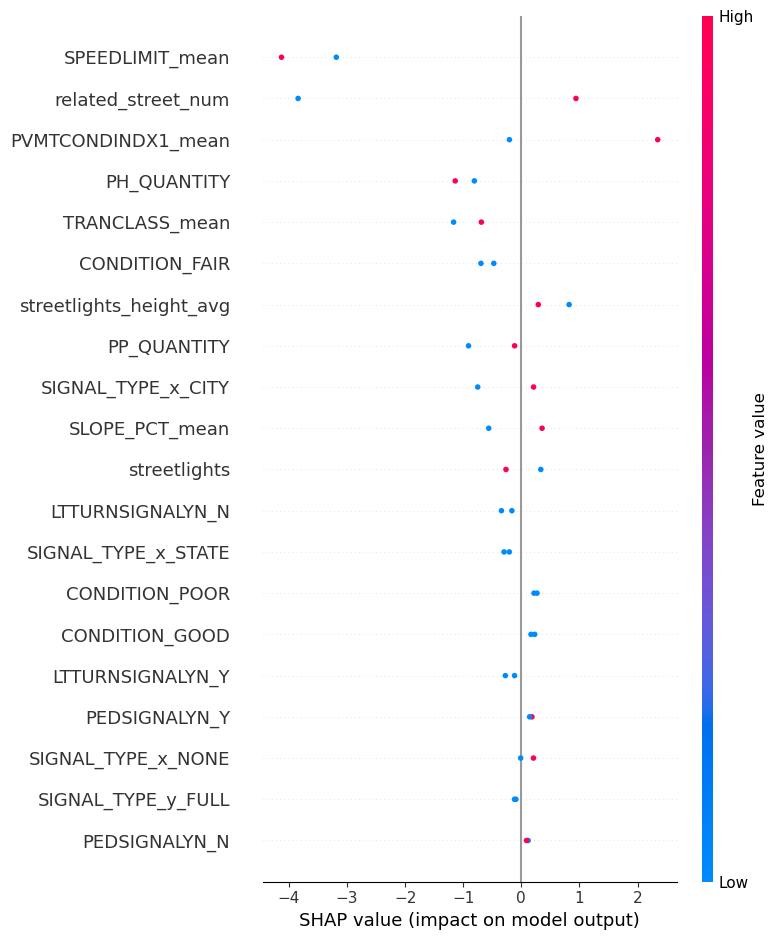

In [66]:
import shap

# Create a SHAP explainer object for the random forest model
explainer = shap.Explainer(rf, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test,check_additivity=False)

# Generate the summary plot
shap.summary_plot(shap_values, X_test)